In [28]:
import sys
sys.path.append("../")
from GeoToolkit.Mag import Mag, ProblemSetter, MathUtils, Simulator, DataIO
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Create a grid of locations
X, Y = np.meshgrid(np.linspace(-15, 15, 21),np.linspace(-15, 15, 21))
Z = np.ones_like(X) * 5

survey, mesh, model = ProblemSetter.setSyntheticProblem(np.c_[X.flatten(), Y.flatten(), Z.flatten()], EarthField=[50000, 90, 0])

In [30]:
inc, dec = 30, -15

survey = Mag.createMagSurvey(np.c_[X.flatten(), Y.flatten(), Z.flatten()], EarthField=[50000, inc, dec])
prism = Simulator.definePrism()
prob = Mag.Problem(prism=prism, survey=survey)

survey._dobs=prob.fields()[0]

In [31]:
# Simulator.ViewMagSurveyWidget(survey)


In [32]:
grid = DataIO.dataGrid()

grid._values = survey.dobs.reshape(X.shape)
grid.nx, grid.ny = grid.values.shape[1], grid.values.shape[0]

grid.dx = (X.max() - X.min()) / (grid.values.shape[1] - 1)
grid.dy = (Y.max() - Y.min()) / (grid.values.shape[0] - 1)

grid.x0, grid.y0 = X.min()-grid.dx/2., Y.min()-grid.dy/2.

grid.limits = np.r_[grid.x0, grid.x0+grid.nx*grid.dx, grid.y0, grid.y0+grid.ny*grid.dy]
        
grid.inc, grid.dec = inc, dec



In [26]:
grid.x0

-15.75

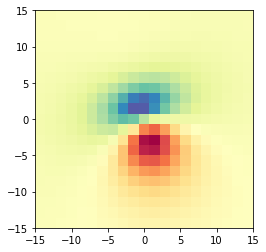

In [33]:
axs = plt.subplot()
out = Simulator.plotDataHillside(
        grid.hx, grid.hy, grid.values, axs=axs, alpha=1, alphaHS=0, equalizeHist=True)

axs.set_aspect('equal')

In [34]:
# Rotate the fields
grid.setRTP(True)
axs = plt.subplot()
out = Simulator.plotDataHillside(
        grid.hx, grid.hy, grid.values, axs=axs, alpha=1, alphaHS=0, equalizeHist=False)



ValueError: operands could not be broadcast together with shapes (63,63) (62,62) 